Jayson/Mitchell
#Automobiles dataset

#**Introduction**

Cars are an essential form of transportation that have been consistently evolving with different car brands bringing more innovation than the next. This data set can help us understand what makes the best car for a specific userbases (sports car vs gas economic car). Various attributes of a car such as cylinders, body shape, fuel-type, peak rpm, etc vastly influence its performance and for which a large portion of people are most concerned about - gas mileage. Gas prices have increased and more fuel economic choices are becoming much more appealing.

#**Research Questions**

Question: What is the best combination of features for gas mileage?

Explanation: We will analyze data on different combinations of car attributes to get the best gas mileage performance.

#**Data**
We will be retrieving our data from UCI, by downloading they're CSV file fom: ('https://archive.ics.uci.edu/ml/datasets/Automobile')


#**Approach**
We intend to find these correlations through heatmaps, bar graphs, boxplots, catplots, etc. This and finding relationships between variables and doing regressions will be part of our EDA (exploratory data analysis). We believe that horsepower, number of cylinders, and drive-wheel (4WD, RWD, FWD) will hold the most influence over gas ecomony. Our hope is that this information can be used to either make more efficient vehicles or assist those that are looking for a more specific perfomance out of a car.





In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import numpy as np

#Naming the missing column names
column_names = ['Symboling', 'normalized-losses', 'make','Fuel-type', 'Aspiration', '# of Doors', 'Body-Style', 'Drive-Train', 'Engine Location',\
                'Wheel-base', 'length', 'Width', 'Height', 'Curb-Weight', 'Engine-type', '# of Cylinders', 'Engine Size', 'Fuel System', 'Bore', 'Stroke',\
                'Compression-Ratio', 'Horsepower', 'Peak RPM', 'City MPG', 'Highway MPG', 'Price']

df = pd.read_csv('https://raw.githubusercontent.com/YsGonzo/Colab/main/imports-85.csv', names = column_names)


#Dropping values with "?" in categorical data and a mostly empty column.
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = df.drop(27)
df = df.drop(63)
df = df.drop(columns=['normalized-losses'])
df.head(5)

,Symboling,make,Fuel-type,Aspiration,# of Doors,Body-Style,Drive-Train,Engine Location,Wheel-base,length,Width,Height,Curb-Weight,Engine-type,# of Cylinders,Engine Size,Fuel System,Bore,Stroke,Compression-Ratio,Horsepower,Peak RPM,City MPG,Highway MPG,Price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#Definitions
* Symboling - A rating from -3 to 3 that corresponds to the degree to which the car is more risky than it's price.
* Make - The brand of the car (Toyota, Mitsubishi, Volkswagen, etc.)
* Fuel Type - Car either uses gas or diesel
* Aspiration - Standard or Turbo
* Body Style - hardtop, wagon, sedan, hatchback, convertible.
* drive-wheels - 4 Wheel Drive, Front Wheel Drive, Rear Wheel Drive


In [ ]:
#Data types of the set
df.info()

print('\n')
#The quantity of unique values 
df.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          203 non-null    int64  
 1   make               203 non-null    object 
 2   Fuel-type          203 non-null    object 
 3   Aspiration         203 non-null    object 
 4   # of Doors         203 non-null    object 
 5   Body-Style         203 non-null    object 
 6   Drive-Train        203 non-null    object 
 7   Engine Location    203 non-null    object 
 8   Wheel-base         203 non-null    float64
 9   length             203 non-null    float64
 10  Width              203 non-null    float64
 11  Height             203 non-null    float64
 12  Curb-Weight        203 non-null    int64  
 13  Engine-type        203 non-null    object 
 14  # of Cylinders     203 non-null    object 
 15  Engine Size        203 non-null    int64  
 16  Fuel System        203 non

Symboling              6
make                  22
Fuel-type              2
Aspiration             2
# of Doors             2
Body-Style             5
Drive-Train            3
Engine Location        2
Wheel-base            53
length                75
Width                 44
Height                49
Curb-Weight          170
Engine-type            7
# of Cylinders         7
Engine Size           44
Fuel System            8
Bore                  39
Stroke                37
Compression-Ratio     31
Horsepower            59
Peak RPM              23
City MPG              28
Highway MPG           30
Price                185
dtype: int64

In [ ]:
#This dataset contains Zero null data
df.isnull().sum()

Symboling            0
make                 0
Fuel-type            0
Aspiration           0
# of Doors           0
Body-Style           0
Drive-Train          0
Engine Location      0
Wheel-base           0
length               0
Width                0
Height               0
Curb-Weight          0
Engine-type          0
# of Cylinders       0
Engine Size          0
Fuel System          0
Bore                 0
Stroke               0
Compression-Ratio    0
Horsepower           0
Peak RPM             0
City MPG             0
Highway MPG          0
Price                0
dtype: int64

In [ ]:
#There are values that are not "NaNs" and instead "?",
#Therefore we'll be converting # of Cylinders, # of Doors, Bore, Stroke, Horsepower, Peak RPM, and Price to NaNs before imputing.


df.replace({'Bore': {'?': np.nan}}, regex=False,inplace=True)
df.replace({'Horsepower': {'?':np.nan}}, regex=False, inplace=True)
df.replace({'# of Cylinders': {'?':np.nan}}, regex=False, inplace=True)
df.replace({'# of Doors': {'?':np.nan}}, regex=False, inplace=True)
df.replace({'Stroke': {'?':np.nan}}, regex=False, inplace=True)
df.replace({'Peak RPM': {'?':np.nan}}, regex=False, inplace=True)
df.replace({'Price': {'?':np.nan}}, regex=False, inplace=True)

In [ ]:
#converting number of cylinders and number of doors, bore, stroke, horsepower, peak rpm, and price to numeric form
df[['Horsepower','Bore', 'Stroke', 'Peak RPM']] = \
  df[['Horsepower','Bore', 'Stroke', 'Peak RPM']].apply(pd.to_numeric)


#We can see that there is now null data, since the "?" were removed.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          203 non-null    int64  
 1   make               203 non-null    object 
 2   Fuel-type          203 non-null    object 
 3   Aspiration         203 non-null    object 
 4   # of Doors         203 non-null    object 
 5   Body-Style         203 non-null    object 
 6   Drive-Train        203 non-null    object 
 7   Engine Location    203 non-null    object 
 8   Wheel-base         203 non-null    float64
 9   length             203 non-null    float64
 10  Width              203 non-null    float64
 11  Height             203 non-null    float64
 12  Curb-Weight        203 non-null    int64  
 13  Engine-type        203 non-null    object 
 14  # of Cylinders     203 non-null    object 
 15  Engine Size        203 non-null    int64  
 16  Fuel System        203 non

##Histogram
presenting patterns and clusters of cars featuring the same curb-weight and engine sizes. There also appears to be outliers in both compression-ratio, engine size, and MPG which may all be correlated.

What are some expected/common values for the listed vehicles?
- We can see that most cars have a symboling of 0 which makes sense, since it corresponds to the degree to which the car is more risky than it's price. 0 being average.
- We can also see that most cars on the highway get around 35 mileage and 25 mileage in the city.
- It shows that only a few cars pass 5500 RPM and most stay around 70 horsepower.

<function matplotlib.pyplot.show>

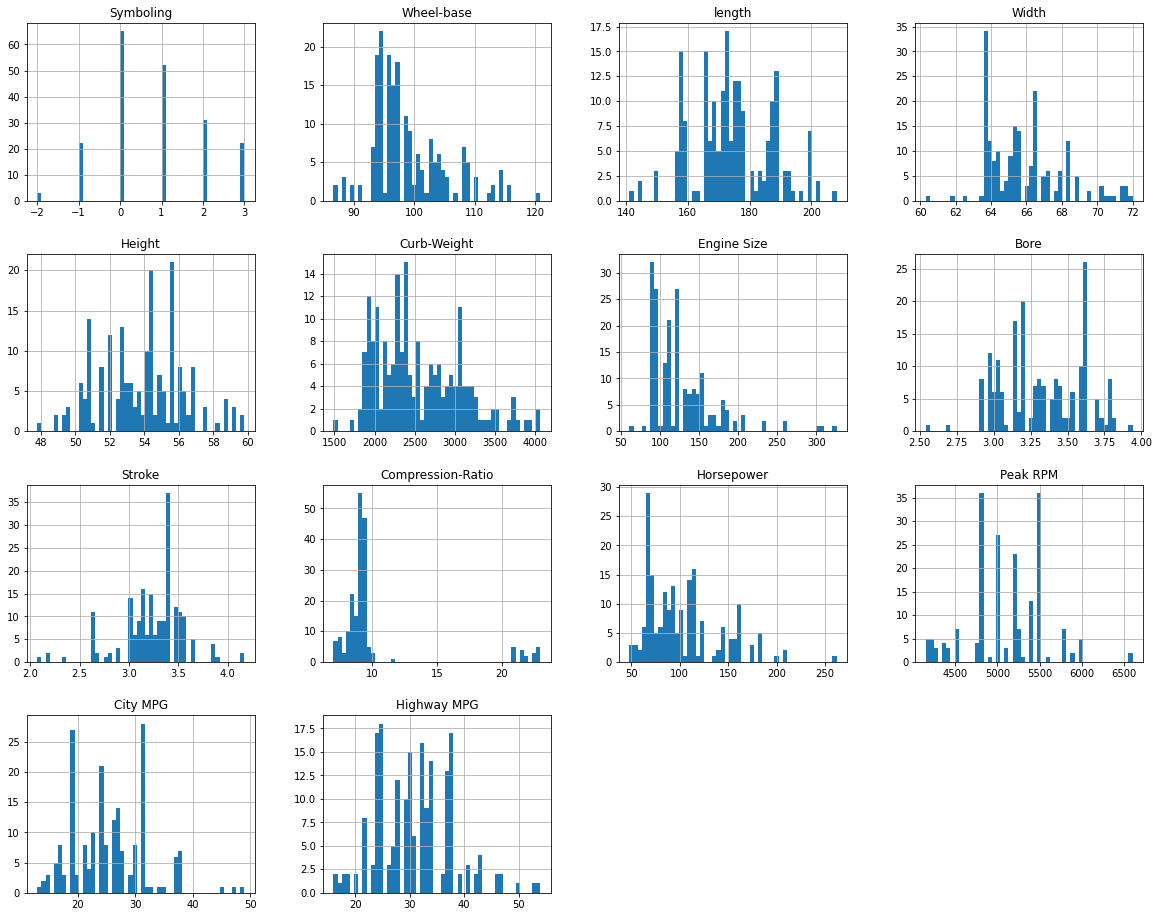

In [ ]:
#Copy of dataframe with only numerical data
df2 = df.copy()
df2.drop(['make','Fuel-type','Aspiration','# of Doors','Body-Style','Drive-Train','Engine Location','Engine-type','# of Cylinders', 'Fuel System', 'Price'], axis = 1)


df2.hist(bins=50, figsize=(20,16))
plt.show

#Correlation Matrix
We will use the seaborn library to see the correlation between all our variables.


What variables have the greatest correlation with a car's mileage?
- We can see that peak RPM has a positive influence during highway driving, seing as you maintain a higher speed for a long distance.
- Compression-ratio does not have a considerable correlation to mileage.
- The greatest negative correlation is with horsepower meaning that the higher it is, the lower your mileage will most likely end up being.
- The car's length, width, and curb-weight do end up like expected, decreasing the mileage, but the height does not effect anywhere near as much.

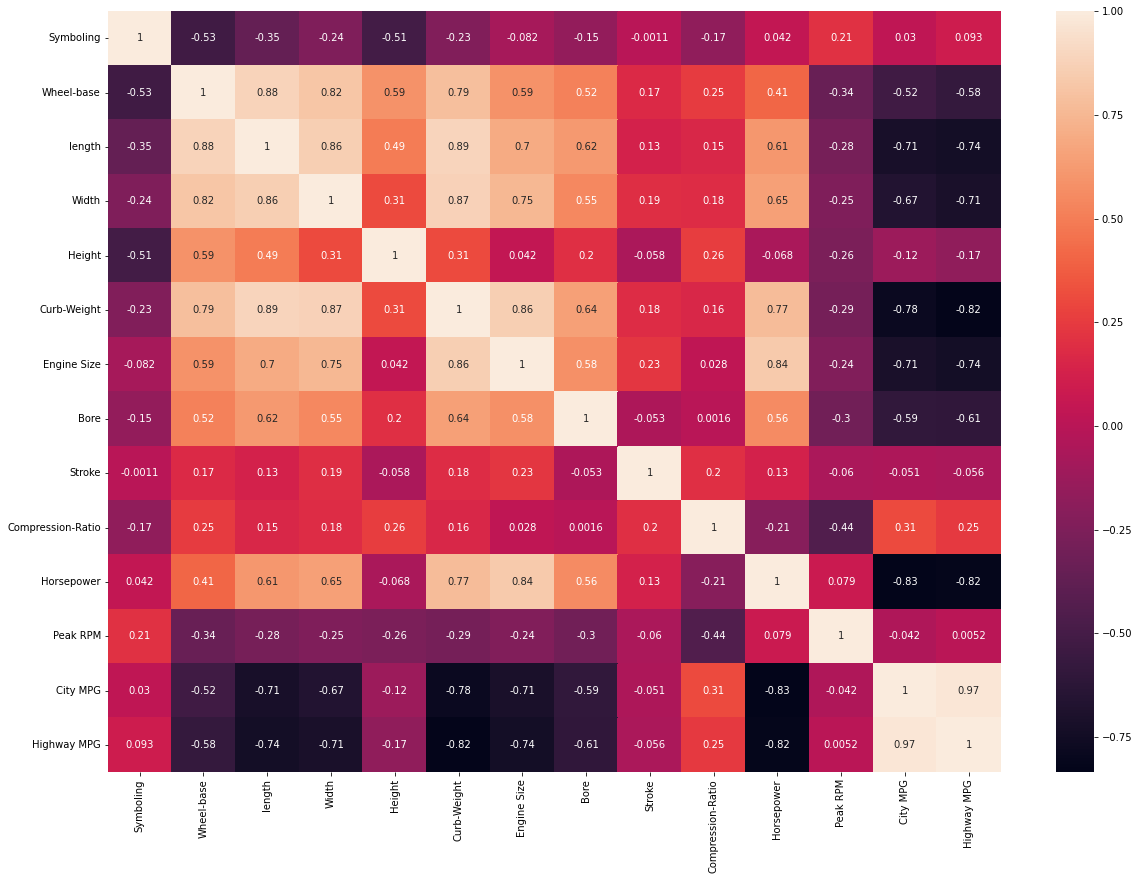

In [ ]:
corrMatrix = df.corr()
plt.figure(figsize=(20,14))
sns.heatmap(corrMatrix, annot=True)
plt.show()

#Scatterplot
Does the compression-ratio effect your highway mileage in a substantial way?
- We found that the compression ratio which is the ratio between the volume of the cylinder and combustion chamber in an engine at their maximum and minimum did not end up vary much between cars and when the ratios where much higher the mileage did not change in a substantial way either.

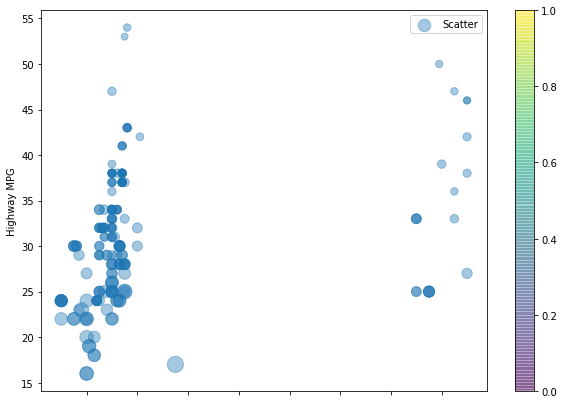

In [ ]:
df.plot(kind="scatter", x="Compression-Ratio", y="Highway MPG", alpha=0.4, s=df["Horsepower"], label="Scatter", figsize=(10,7), cmap='viridis', colorbar=True)
plt.legend()

#Imputing
We used the scikit library to create an imputer with a copied dataframe which dropped all categorical data. This makes it into an array which we convert back to a Dataframe and then confirm that we no longer have any NaNs.

In [ ]:
#importing scikit-learn for imputing and estimating
from sklearn.impute import SimpleImputer


#copy of dataframe that drops categorical data
df_numerical = df.copy()
df_numerical.drop(['make','Fuel-type','Aspiration','# of Doors','Body-Style','Drive-Train','Engine Location','Engine-type','# of Cylinders', 'Fuel System'], axis = 1, inplace=True)

#imputing strategy
imp = SimpleImputer(missing_values = np.nan, strategy = 'median')

#convert given numpy array back to dataframe
df_numerical = pd.DataFrame(imp.fit_transform(df_numerical))

#Here we can see that there is no more null data.
#(The column names where lost after converting to array and back to dataset)
df_numerical.info()
df_numerical.head(206)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       203 non-null    float64
 1   1       203 non-null    float64
 2   2       203 non-null    float64
 3   3       203 non-null    float64
 4   4       203 non-null    float64
 5   5       203 non-null    float64
 6   6       203 non-null    float64
 7   7       203 non-null    float64
 8   8       203 non-null    float64
 9   9       203 non-null    float64
 10  10      203 non-null    float64
 11  11      203 non-null    float64
 12  12      203 non-null    float64
 13  13      203 non-null    float64
 14  14      203 non-null    float64
dtypes: float64(15)
memory usage: 23.9 KB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,13495.0
1,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,16500.0
2,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.00,154.0,5000.0,19.0,26.0,16500.0
3,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.00,102.0,5500.0,24.0,30.0,13950.0
4,2.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.00,115.0,5500.0,18.0,22.0,17450.0
5,2.0,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,15250.0
6,1.0,105.8,192.7,71.4,55.7,2844.0,136.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,17710.0
7,1.0,105.8,192.7,71.4,55.7,2954.0,136.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,18920.0
8,1.0,105.8,192.7,71.4,55.9,3086.0,131.0,3.13,3.40,8.30,140.0,5500.0,17.0,20.0,23875.0
9,0.0,99.5,178.2,67.9,52.0,3053.0,131.0,3.13,3.40,7.00,160.0,5500.0,16.0,22.0,10295.0


#Regression Model
- We will be testing horsepower

In [ ]:
from sklearn import preprocessing


min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(df_numerical)

df_scaled = pd.DataFrame(x_scaled)
df_scaled.columns = ['Symboling','Wheel-base','Length','Width','Height','Curb-Weight','Engine Size','Bore','Stroke','Compression-Ratio', 'Horsepower','Peak RPM','City MPG','Highway MPG','Price']

In [ ]:
from sklearn.linear_model import LinearRegression

y = df_scaled['Horsepower'].copy()
x = df_scaled.drop(['Horsepower'], axis = 1)

lin_reg=LinearRegression().fit(x,y)
r_sq = lin_reg.score(x,y)

print(r_sq)

0.8891941797255277


In [ ]:
import statsmodels.api as sm

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             Horsepower   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              351.4
Date:                Wed, 08 Dec 2021   Prob (F-statistic):                   4.64e-123
Time:                        03:01:45   Log-Likelihood:                          277.11
No. Observations:                 195   AIC:                                     -526.2
Df Residuals:                     181   BIC:                                     -480.4
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

#**Conclusion**#

In conclusion, the best combination for gas mileage would be.. 

 * a light car 
 * a car thats not long or wide 
 * a small engine 
 * a car with lower horsepower for higher gas mileage


We made a regression model both manually and with the statsmodel.api for the statistics and create multiple graphs to visualize the relationship between each variable. We were also able to impute our data with the median after having converted it from the string "?" to NaNs.
